In [1]:
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import edward2 as ed
import warnings

plt.style.use("ggplot")
warnings.filterwarnings('ignore')

/Users/Rhys/.local/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:66: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  _inspect.getargspec(target))
/Users/Rhys/.local/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:66: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  _inspect.getargspec(target))
/Users/Rhys/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Rhys/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/Rhys/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got

/Users/Rhys/.local/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:66: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  _inspect.getargspec(target))
/Users/Rhys/.local/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:66: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  _inspect.getargspec(target))
/Users/Rhys/.local/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:66: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  _inspect.getargspec(target))
/Users/Rhys/.local/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:66: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  _inspect.getargspec(target))
/Users/Rhys/.local/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:66: Depr

In [4]:
frequencies = np.loadtxt('../frequencies_test.txt')
frequencies.shape

(8193,)

In [11]:
frequencies = 3*frequencies

In [5]:
def lambda0(neta , mass):        
    return 3/(128 * neta * (np.pi*mass)**(5/3))

In [6]:
def phase(tc , phic , f, neta , mass ):
    rh_term = lambda0(neta , mass)*f**(-4/3)
    return 2*np.pi*f*tc + phic + rh_term

In [7]:
def strain(amplitude , mass , distance, neta , f ,tc , phic ):
    exponent = 1j*phase(tc, phic, f, neta ,lambda0(neta, mass)) + 1j*(np.pi/4) 
    return (amplitude * mass**(5/6))/(distance*np.pi**(2/3))* ((5*neta)/(24))**(-7/6)*np.exp(exponent)

In [47]:
def waveform_model(amplitude , mass_prior , distance, neta_prior , f ,tc , phic):
    neta = ed.Normal(loc=neta_prior, scale=0.5, name="neta")
    mass = ed.Normal(loc=mass_prior , scale=50.0, name="mass")
    lambda0 = 3/(128 * neta * (np.pi*mass)**(5/3))
    rh_term = lambda0*f**(-4/3)
    phase = 2*np.pi*f*tc + phic + rh_term
    exponent = 1j*phase + 1j*(np.pi/4) 
    strain_rand = (amplitude * mass**(5/6))/(distance*np.pi**(2/3))* ((5*neta)/(24))**(-7/6)*np.exp(exponent) 
    return strain_rand



In [44]:
neta_prior = 0.2
mass_prior = 20.0
phic = 0
tc =0
f = tf.placeholder(tf.float32)
amplitude = 10**-3 §
distance = 1

In [57]:
a = tf.exp(tf.complex(0.0 , np.pi))
sess = tf.Session()
sess.run(np.abs(a))

1.0

In [58]:
neta = ed.Normal(loc=neta_prior, scale=0.5, name="neta")
mass = ed.Normal(loc=mass_prior , scale=50.0, name="mass")
lambda0 = 3/(128 * neta * (np.pi*mass)**(5/3))
rh_term = lambda0*f**(-4/3)
phase = 2*np.pi*f*tc + phic + rh_term
exponent = tf.exp(tf.complex(0.0 , phase + np.pi/4)) 
strain_rand = (amplitude * mass**(5/6))/(distance*np.pi**(2/3))* ((5*neta)/(24))**(-7/6)*(exponent) 


TypeError: Input 'y' of 'Mul' Op has type complex64 that does not match type float32 of argument 'x'.

In [26]:
waveform = strain(10**-3, 30 , 1 , 0.25 , 0.1
                  *frequencies , 10**-10 , 1)


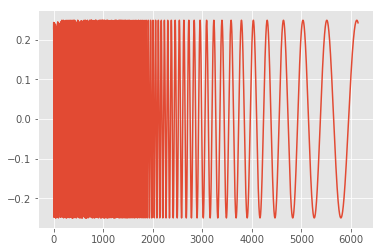

In [28]:
plt.plot(frequencies,waveform)
plt.show()

In [30]:
freq_place = tf.placeholder(tf.float32, [len(frequencies), 1])

In [48]:
y = (waveform_model(1 , 20.0 , 1, 0.2, freq_place ,0 , 0))

TypeError: Expected float32, got 1j of type 'complex' instead.